In [1]:
import numpy as np
import pandas as pd

In [2]:
message = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
message.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
message.shape

(5572, 5)

In [5]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
message.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
message.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
message.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
message.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
message.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
message.rename(columns={'v1':'spam','v2':'message'},inplace=True)

In [12]:
message.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
message['spam'] = encoder.fit_transform(message['spam'])

In [15]:
message.head()

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
message.duplicated().sum()

403

In [17]:
message=message.drop_duplicates(keep='first')

In [18]:
message.duplicated().sum()

0

In [19]:
message['spam'].value_counts()

0    4516
1     653
Name: spam, dtype: int64

<Axes: >

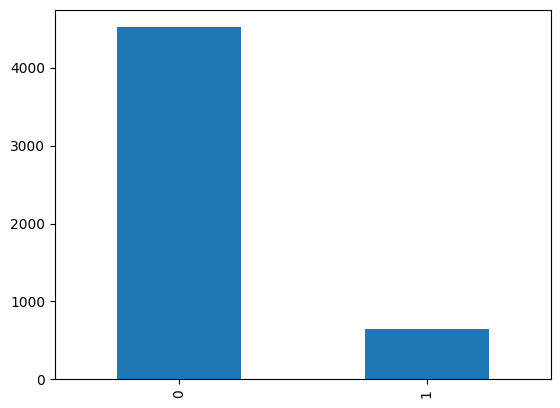

In [20]:
message['spam'].value_counts().plot(kind='bar')

In [21]:
x=np.array(message['message'])
y=np.array(message['spam'])

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [23]:
X= cv.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [25]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [26]:
model.fit(X_train,y_train)

MultinomialNB()

In [27]:
prediction = model.predict(X_test)

In [28]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99      1348\n           1       0.92      0.89      0.90       203\n\n    accuracy                           0.97      1551\n   macro avg       0.95      0.94      0.94      1551\nweighted avg       0.97      0.97      0.97      1551\n'

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[1332,   16],
       [  23,  180]])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9748549323017408

In [32]:
model.score(X_train,y_train)

0.9939192924267551

In [33]:
model.score(X_test,y_test)

0.9748549323017408

In [34]:
sample = input('Enter a message:')
check = cv.transform([sample])
result = model.predict(check)
print(result)

Enter a message: hello ben
[0]


In [35]:
if result == 1:
  print('SPAM')
else:
  print('NOT SPAM')

NOT SPAM
